# About this demo

The video frame extraction acceleration demo shows:
1. BMF flexible capability
2. Hardware acceleration quickly enablement and CPU/GPU pipeline support

The graph looks like:

Video Decode by CPU or GPU ==> FPS filter frame extraction ==> NV JPEG GPU hardware encode

# Get Started

## 1. Environment Setup
*   install the BMF
*   make sure the GPU environment is ready



### 1-1 pip install BMF packages

In [2]:
pip install BabitMF-GPU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 7.1 MB/s eta 0:00:00


In [3]:
!ls /usr/local/lib/python3.10/dist-packages/bmf/lib/

_bmf.cpython-310-x86_64-linux-gnu.so  libbuiltin_modules.so
_hmp.cpython-310-x86_64-linux-gnu.so  libbuiltin_modules.so.0.0.5
libbmf_go_loader.so		      libengine.so
libbmf_module_sdk.so		      libengine.so.0.0.5
libbmf_module_sdk.so.0.0.5	      libhmp.so
libbmf_py_loader.so		      libhmp.so.1.2


To install a GPU supported version of BMF:

In [4]:
%env LIBRARY_PATH=$LIBRARY_PATH:/usr/local/lib/python3.10/dist-packages/bmf/lib

env: LIBRARY_PATH=$LIBRARY_PATH:/usr/local/lib/python3.10/dist-packages/bmf/lib


### 1-2 verify the FFmpeg libraries is installed and version is correct

Part of feature in BMF framework utilizes the FFmpeg demuxer/muxer/codec and filter as the built-in modules for video processing. **If the capability of ffmpeg is needed,it's neccessary for users to install supported FFmpeg libraries before using BMF.**

**Optional step**

Install ffmpeg and related libraries. For this demo, we don't have to do this step, because ffmpeg libraries are already installed in the Google Colab environment.

In [5]:
!sudo apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


List the ffmpeg libraries. It is expected that the related libraries such libavcodec, libavformat are installed. The output should be showned as below:
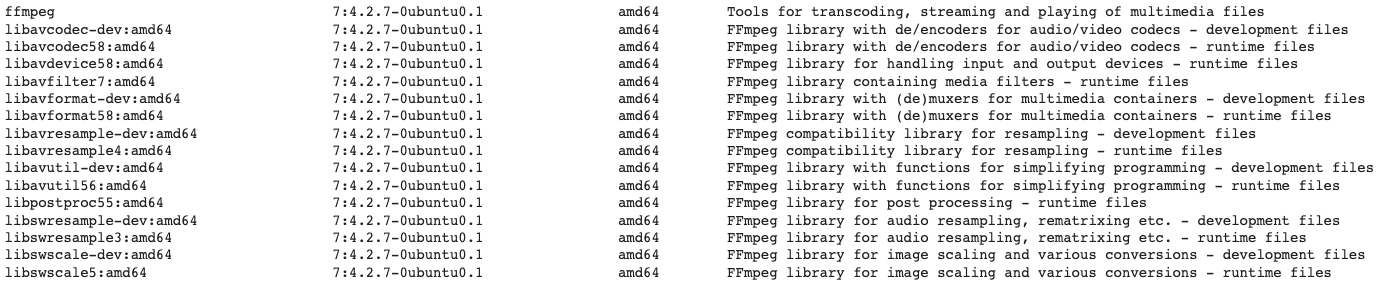

In [6]:
!sudo apt install libdw1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libdw1
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 226 kB of archives.
After this operation, 968 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libdw1 amd64 0.176-1.1build1 [226 kB]
Fetched 226 kB in 0s (2,759 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libdw1:amd64.
(Reading database ... 123069 files and directories cur

In [7]:
!dpkg -l | grep -i ffmpeg

ii  ffmpeg                                 7:4.2.7-0ubuntu0.1                amd64        Tools for transcoding, streaming and playing of multimedia files
ii  libavcodec-dev:amd64                   7:4.2.7-0ubuntu0.1                amd64        FFmpeg library with de/encoders for audio/video codecs - development files
ii  libavcodec58:amd64                     7:4.2.7-0ubuntu0.1                amd64        FFmpeg library with de/encoders for audio/video codecs - runtime files
ii  libavdevice58:amd64                    7:4.2.7-0ubuntu0.1                amd64        FFmpeg library for handling input and output devices - runtime files
ii  libavfilter7:amd64                     7:4.2.7-0ubuntu0.1                amd64        FFmpeg library containing media filters - runtime files
ii  libavformat-dev:amd64                  7:4.2.7-0ubuntu0.1                amd64        FFmpeg library with (de)muxers for multimedia containers - development files
ii  libavformat58:amd64                    7:4.

Display the FFmpeg version. **BMF supports the FFmpeg verions above 4.2.x.**

In [8]:
!ffmpeg -version

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enabl

### 1-3 install wurlitzer

This package is installed to show the BMF C++ logs in the colab console, otherwise only python logs are printed. This step is not necessary if you're not in a Colab or iPython notebook environment.

In [9]:
!pip install wurlitzer
%load_ext wurlitzer

## 2. BMF Video Frame Extraction Demo
*   we can set up the BMF processing pipeline (decoding->fps extraction->jpeg encoding) and run to show a normal way of video frame extraction by BMF.
*   and in terms of gpu acceleration that a c++ jpeg hardware encode BMF module is implemented.
*   a gpu acceleration video frame extraction BMF graph can be set up and run.

### 2-1 Normal way of video frame extraction by BMF

In [10]:
!gdown --fuzzy https://drive.google.com/file/d/1l8bDSrWn6643aDhyaocVStXdoUbVC3o2/view?usp=sharing -O big_bunny_10s_30fps.mp4


Downloading...
From: https://drive.google.com/uc?id=1l8bDSrWn6643aDhyaocVStXdoUbVC3o2
To: /content/big_bunny_10s_30fps.mp4
100% 2.56M/2.56M [00:00<00:00, 232MB/s]


In [11]:
import bmf

input_video_path = "/content/big_bunny_10s_30fps.mp4"
output_path = "./simple_%03d.jpg"
graph = bmf.graph({'dump_graph':1})

video = graph.decode({
    "input_path": input_video_path,
}).fps(2)

(
    bmf.encode(
        video['video'],
        None,
        {
            "output_path": output_path,
            "format": "image2",
            "video_params": {
                "codec": "jpg",
            }
        }
    )
    .run()
)

{
    "input_streams": [],
    "output_streams": [],
    "nodes": [
        {
            "module_info": {
                "name": "c_ffmpeg_decoder",
                "type": "",
                "path": "",
                "entry": ""
            },
            "meta_info": {
                "premodule_id": -1,
                "callback_binding": []
            },
            "option": {
                "input_path": "/content/big_bunny_10s_30fps.mp4"
            },
            "input_streams": [],
            "output_streams": [
                {
                    "identifier": "c_ffmpeg_decoder_0_0",
                    "stream_alias": ""
                }
            ],
            "input_manager": "immediate",
            "scheduler": 0,
            "alias": "",
            "id": 0
        },
        {
            "module_info": {
                "name": "c_ffmpeg_filter",
                "type": "",
                "path": "",
                "entry": ""
            },
         

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/content/big_bunny_10s_30fps.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.76.100
  Duration: 00:00:10.00, start: 0.000000, bitrate: 2044 kb/s
    Stream #0:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p, 1920x1080 [SAR 1:1 DAR 16:9], 1904 kb/s, 30 fps, 30 tbr, 15360 tbn, 60 tbc (default)
    Metadata:
      handler_name    : VideoHandler
    Stream #0:1(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, stereo, fltp, 129 kb/s (default)
    Metadata:
      handler_name    : SoundHandler


[2023-07-05 14:11:16.424] [info] BMF Version: 0.0.5
[2023-07-05 14:11:16.424] [info] BMF Commit: 98e17ef
[2023-07-05 14:11:16.424] [info] start init graph
[2023-07-05 14:11:16.424] [info] scheduler count2
debug queue size, node 0, queue size: 5
[2023-07-05 14:11:16.424] [info] node:c_ffmpeg_decoder 0 scheduler 0
debug queue size, node 2, queue size: 5
[2023-07-05 14:11:16.424] [info] node:c_ffmpeg_encoder 2 scheduler 1
debug queue size, node 1, queue size: 5
[2023-07-05 14:11:16.424] [info] Constructing c++ module
[2023-07-05 14:11:16.424] [info] c++ module constructed
[2023-07-05 14:11:16.424] [info] node:c_ffmpeg_filter 1 scheduler 0


Output #0, image2, to './simple_%03d.jpg':
  Metadata:
    encoder         : Lavf58.29.100
    Stream #0:0: Video: mjpeg, yuvj444p(pc), 1920x1080 [SAR 1:1 DAR 16:9], q=2-31, 2 fps, 2 tbr, 2 tbn, 2 tbc
[swscaler @ 0x3329280] deprecated pixel format used, make sure you did set range correctly


[2023-07-05 14:11:19.659] [info] node id:0 decode flushing
[2023-07-05 14:11:19.659] [info] node id:0 Process node end
[2023-07-05 14:11:19.665] [info] node id:0 close node
[2023-07-05 14:11:19.665] [info] node 0 close report, closed count: 1
[2023-07-05 14:11:19.665] [info] node id:1 eof received
[2023-07-05 14:11:19.665] [info] node id:1 eof processed, remove node from scheduler
[2023-07-05 14:11:19.665] [info] node id:1 process eof, add node to scheduler
[2023-07-05 14:11:19.665] [info] node id:1 Process node end
[2023-07-05 14:11:19.666] [info] node id:1 close node
[2023-07-05 14:11:19.666] [info] node 1 close report, closed count: 2
[2023-07-05 14:11:19.666] [info] node id:2 eof received
[2023-07-05 14:11:19.666] [info] node id:2 eof processed, remove node from scheduler
[2023-07-05 14:11:19.696] [info] node id:2 process eof, add node to scheduler
[2023-07-05 14:11:19.696] [info] node id:2 Process node end
[2023-07-05 14:11:19.698] [info] node id:2 close node
[2023-07-05 14:11:19.

Show some frames were extracted from the input video:

In [12]:
!ls /content/*.jpg

/content/simple_001.jpg  /content/simple_008.jpg  /content/simple_015.jpg
/content/simple_002.jpg  /content/simple_009.jpg  /content/simple_016.jpg
/content/simple_003.jpg  /content/simple_010.jpg  /content/simple_017.jpg
/content/simple_004.jpg  /content/simple_011.jpg  /content/simple_018.jpg
/content/simple_005.jpg  /content/simple_012.jpg  /content/simple_019.jpg
/content/simple_006.jpg  /content/simple_013.jpg  /content/simple_020.jpg
/content/simple_007.jpg  /content/simple_014.jpg


### 2-2 Customized Hardware Accelerated Jpeg Encode BMF module

#### 2-2-1 Above setion shows a normal way to extract frames, and next we can implemented a BMF module which mainly to encode frames into jpeg images by GPU.

In [13]:
%%writefile /content/jpeg_encoder.cpp

/*
 * Copyright 2023 Babit Authors
 *
 * Licensed under the Apache License, Version 2.0 (the "License");
 * you may not use this file except in compliance with the License.
 * You may obtain a copy of the License at
 *
 *     http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */

#include <bmf/sdk/bmf_av_packet.h>
#include <bmf/sdk/common.h>
#include <bmf/sdk/module.h>
#include <bmf/sdk/module_registry.h>
#include <bmf/sdk/task.h>
#include <bmf/sdk/video_frame.h>
#include <bmf/sdk/ffmpeg_helper.h>
#include <bmf/sdk/error_define.h>

/*
extern "C" {
#include <libavcodec/packet.h>
}
*/

#include <nvjpeg.h>

#include <cstdlib>
#include <fstream>
#include <mutex>
#include <omp.h>
#include <queue>
#include <unordered_map>

USE_BMF_SDK_NS

#define CHECK_NVJPEG(func, errer_log, _ret, WHETHER_RET)   \
    do {                                                   \
        auto status = func;                                \
        if (status != NVJPEG_STATUS_SUCCESS) {             \
            BMFLOG_NODE(BMF_ERROR, node_id_) << errer_log; \
            if (WHETHER_RET)                               \
                return _ret;                               \
        }                                                  \
    } while (0);

class jpeg_encoder : public bmf_sdk::Module {
public:
    jpeg_encoder(int node_id, bmf_sdk::JsonParam option) : bmf_sdk::Module(node_id, option) {
        if (option.has_key("width") && option.json_value_["width"].is_number()) {
            m_encode_w = option.json_value_["width"];
        }
        if (option.has_key("height") && option.json_value_["height"].is_number()) {
            m_encode_h = option.json_value_["height"];
        }
        BMFLOG_NODE(BMF_INFO, node_id_) << "encode frame size is: "
                                        << m_encode_w << "x" << m_encode_h;
        if (option.has_key("quality") && option.json_value_["quality"].is_number()) {
            m_encode_q = option.json_value_["quality"];
        }
        BMFLOG_NODE(BMF_INFO, node_id_) << "encode param set to " << m_encode_q;
    }

    ~jpeg_encoder() { close(); }

    virtual int init() {
        // cudaStreamCreate(&m_stream);
        m_stream = nullptr;

        // nvjpeg
        CHECK_NVJPEG(nvjpegCreateSimple(&m_handle),
                     "nvjpeg create handle error. ", -1, true);
        CHECK_NVJPEG(nvjpegEncoderParamsCreate(m_handle, &m_enc_param, m_stream),
                     "nvjpeg create enc param error. ", -1, true);
        CHECK_NVJPEG(nvjpegEncoderStateCreate(m_handle, &m_enc_state, m_stream),
                     "nvjpeg create jpeg enc state error. ", -1, true);

        // set param
        CHECK_NVJPEG(nvjpegEncoderParamsSetQuality(m_enc_param, m_encode_q, m_stream),
                     "nvjpeg set enc quality error. ", -1, true);
        auto status = nvjpegEncoderParamsSetEncoding(m_enc_param,
                                                     NVJPEG_ENCODING_BASELINE_DCT,
                                                     m_stream);
        status = nvjpegEncoderParamsSetOptimizedHuffman(m_enc_param, 2, m_stream);
        status = nvjpegEncoderParamsSetSamplingFactors(m_enc_param, NVJPEG_CSS_420, m_stream);

        return 0;
    }

    virtual int close() {
        if (m_enc_param) {
            nvjpegEncoderParamsDestroy(m_enc_param);
            m_enc_param = nullptr;
        }
        if (m_enc_state) {
            nvjpegEncoderStateDestroy(m_enc_state);
            m_enc_state = nullptr;
        }
        if (m_handle) {
            CHECK_NVJPEG(nvjpegDestroy(m_handle),
                         "nvjpeg handle destroy error. ", -1, true);
            m_handle = nullptr;
        }
        if (m_stream) {
            cudaStreamDestroy(m_stream);
            m_stream = nullptr;
        }
        BMFLOG_NODE(BMF_INFO, node_id_) << "encode " << m_frame_count << " frames.";
        return 0;
    }

    virtual int process(bmf_sdk::Task &task) {
        auto input = task.get_inputs();
        int label = input.begin()->first;
        for (auto it = input.begin(); it != input.end(); it++) {
            label = it->first;
            bmf_sdk::Packet pkt;
            while (task.pop_packet_from_input_queue(label, pkt)) {
                if (pkt.timestamp() == bmf_sdk::Timestamp::BMF_EOF) {
                    task.fill_output_packet(label, bmf_sdk::Packet::generate_eof_packet());
                    task.set_timestamp(bmf_sdk::Timestamp::DONE);
                    return 0;
                }
                auto start = std::chrono::steady_clock::now();

                auto vf = pkt.get<VideoFrame>();
                auto width = vf.width();
                auto height = vf.height();
                // FIX auto planes = frame.get_planes();

                auto format = vf.frame().format();
                // start encoding
                nvjpegImage_t image = {0};
                if (vf.device() == kCUDA) {
                    if (2 != vf.frame().nplanes()) {
                        BMFLOG_NODE(BMF_INFO, node_id_) << "input video frame error. must be nv12 format has 2 planes. this has "
                                                        << vf.frame().nplanes() << " planes.";
                    }

                    if (!vf_rgb)
                        vf_rgb = VideoFrame::make(width, height, RGB, kCUDA);
                    Tensor t_img = vf_rgb.frame().plane(0);
                    hmp::img::yuv_to_rgb(t_img, vf.frame().data(), NV12, kNHWC);
                    if (!vf_yuv_from_rgb)
                        vf_yuv_from_rgb = VideoFrame::make(width, height, H420, kCUDA);
                    TensorList tl = vf_yuv_from_rgb.frame().data();
                    hmp::img::rgb_to_yuv(tl, vf_rgb.frame().plane(0), H420, kNHWC);

                    vf_final_p = &vf_yuv_from_rgb;
                } else {
                    BMFLOG_NODE(BMF_INFO, node_id_) << "frame comes from cpu decoder.";
                    if (format != hmp::PF_YUV420P) {
                        vf_rfmt = ffmpeg::reformat(vf, "yuv420p");
                        BMFLOG_NODE(BMF_INFO, node_id_) << "encode: frame pixel format to yuv420p.";
                        vf_final_p = &vf_rfmt;
                    } else {
                        vf_final_p = &vf;
                    }

                }

                if (m_encode_w && m_encode_h) {
                    if (!vf_resize)
                        vf_resize = VideoFrame::make(m_encode_w, m_encode_h, H420, kCUDA);
                    TensorList tl_resize = vf_resize.frame().data();
                    vf_cuda = vf_final_p->cuda();
                    hmp::img::yuv_resize(tl_resize, vf_cuda.frame().data(), H420);

                    vf_final_p = &vf_resize;
                    width = m_encode_w;
                    height = m_encode_h;
                }
                image.channel[0] = vf_final_p->frame().plane(0).data<uint8_t>();
                image.channel[1] = vf_final_p->frame().plane(1).data<uint8_t>();
                image.channel[2] = vf_final_p->frame().plane(2).data<uint8_t>();
                image.pitch[0] = vf_final_p->frame().plane(0).stride(0);
                image.pitch[1] = vf_final_p->frame().plane(1).stride(0);
                image.pitch[2] = vf_final_p->frame().plane(2).stride(0);

                size_t length = 0;
                CHECK_NVJPEG(nvjpegEncodeYUV(m_handle, m_enc_state, m_enc_param,
                                             &image, NVJPEG_CSS_420, width, height, m_stream),
                             "nvjpeg encode error. ", -1, true);
                CHECK_NVJPEG(nvjpegEncodeRetrieveBitstream(m_handle, m_enc_state, nullptr, &length, m_stream),
                             "nvjpeg get bit stream data error. ", -1, true);
                cudaStreamSynchronize(m_stream);

                // init output
                auto bmf_avpkt = BMFAVPacket(length);
                auto data = bmf_avpkt.data_ptr();
                CHECK_NVJPEG(nvjpegEncodeRetrieveBitstream(m_handle, m_enc_state, (uint8_t *) data, &length, m_stream),
                             "nvjpeg get bit stream data error. ", -1, true);
                cudaStreamSynchronize(m_stream);

                auto packet = Packet(bmf_avpkt);
                packet.set_timestamp(vf_final_p->pts());

                task.fill_output_packet(label, packet);

                auto end = std::chrono::steady_clock::now();
                auto duration = std::chrono::duration_cast<std::chrono::microseconds>(end - start).count();
                BMFLOG_NODE(BMF_INFO, node_id_)  << "encode jpeg " << width << "x"
                                                 << height << " to " << length << " bytes. using "
                                                 << ((float) duration) * 0.001f << " ms";
                m_frame_count++;
            }
        }
        return 0;
    }

private:
    nvjpegHandle_t m_handle = nullptr;
    nvjpegEncoderParams_t m_enc_param = nullptr;
    nvjpegEncoderState_t m_enc_state = nullptr;

    cudaStream_t m_stream = nullptr;

    VideoFrame vf_rgb;
    VideoFrame vf_yuv_from_rgb;
    VideoFrame vf_resize;
    VideoFrame vf_rfmt;
    VideoFrame vf_cuda;
    VideoFrame* vf_final_p;
    int32_t m_encode_w = 0;
    int32_t m_encode_h = 0;
    int32_t m_encode_q = 99;
    int32_t m_frame_count = 0;

    PixelInfo NV12 = PixelInfo(hmp::PF_NV12, hmp::CS_BT470BG);
    PixelInfo H420 = PixelInfo(hmp::PF_YUV420P, hmp::CS_BT709);
    PixelInfo RGB = PixelInfo(hmp::PF_RGB24, hmp::CS_BT709);
};

REGISTER_MODULE_CLASS(jpeg_encoder)


Writing /content/jpeg_encoder.cpp



A cmake file is needed in order to compile the module.
Make sure to set the path of BMF libs, headers and FFmpeg's in the cmake file as bellow:

In [14]:
%%writefile /content/CMakeLists.txt

cmake_minimum_required(VERSION 3.12)
project(jpeg_encoder)
# language setting
# CXX
set(CMAKE_CXX_STANDARD 17)
set(CMAKE_CXX_FLAGS "-Wno-deprecated-declarations")
set(CMAKE_INSTALL_PREFIX ${PROJECT_SOURCE_DIR})

add_definitions(-D_GLIBCXX_USE_CXX11_ABI=0)

if (NOT DEFINED CUDA_ROOT)
    set(CUDA_ROOT /usr/local/cuda)
endif()
set(CUDA_INCLUDE_DIR ${CUDA_ROOT}/include)
set(CUDA_LIBRARY_DIR ${CUDA_ROOT}/lib64)
message(STATUS "detect cuda root: " ${CUDA_INCLUDE_DIR})

SET(MODULE_SRCS ${PROJECT_SOURCE_DIR}/jpeg_encoder.cpp)

add_library(${PROJECT_NAME} SHARED ${MODULE_SRCS})

set(BMF_DIR "/usr/local/lib/python3.10/dist-packages/bmf/")

target_include_directories(${PROJECT_NAME} PRIVATE ${BMF_DIR}/include
                           ${CUDA_INCLUDE_DIR}
                           /usr/local/include /usr/include/x86_64-linux-gnu/)
target_link_libraries(${PROJECT_NAME} PRIVATE nvjpeg cudart
                      bmf_module_sdk)
target_link_directories(${PROJECT_NAME} PRIVATE ${BMF_DIR}/lib
                        ${CUDA_LIBRARY_DIR} /usr/lib/x86_64-linux-gnu/)

Writing /content/CMakeLists.txt


#### 2-2-2 About FFmpeg environment
Since the environment of colab didn't have libavfilter headers of FFmpeg, a extra install is needed :)

In [15]:
!apt install libavfilter-dev libavutil-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavutil-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavutil-dev set to manually installed.
The following NEW packages will be installed:
  libavfilter-dev libpostproc-dev
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,319 kB of archives.
After this operation, 6,411 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libpostproc-dev amd64 7:4.2.7-0ubuntu0.1 [55.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter-dev amd64 7:4.2.7-0ubuntu0.1 [1,264 kB]
Fetched 1,319 kB in 1s (1,578 kB/s)
Selecting previously unselected package libpostproc-dev:amd64.
(Reading database ... 123109 files and directories currently installed.)
Preparing to unpack .../libpostproc-dev_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libpostproc-dev:amd64 (7:4.2.7-0ubuntu0.1) ...
Select

And here we need to add a line in the header of FFmpeg 4.2 which not include a define for AV_CUDA_USE_PRIMARY_CONTEXT. In another way, user can install FFmpeg 4.4+ to solve the problem.

In [16]:
%%writefile /usr/include/x86_64-linux-gnu/libavutil/hwcontext_cuda.h

/*
 * This file is part of FFmpeg.
 *
 * FFmpeg is free software; you can redistribute it and/or
 * modify it under the terms of the GNU Lesser General Public
 * License as published by the Free Software Foundation; either
 * version 2.1 of the License, or (at your option) any later version.
 *
 * FFmpeg is distributed in the hope that it will be useful,
 * but WITHOUT ANY WARRANTY; without even the implied warranty of
 * MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
 * Lesser General Public License for more details.
 *
 * You should have received a copy of the GNU Lesser General Public
 * License along with FFmpeg; if not, write to the Free Software
 * Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA
 */


#ifndef AVUTIL_HWCONTEXT_CUDA_H
#define AVUTIL_HWCONTEXT_CUDA_H

#ifndef CUDA_VERSION
#include <cuda.h>
#endif

#include "pixfmt.h"

/**
 * @file
 * An API-specific header for AV_HWDEVICE_TYPE_CUDA.
 *
 * This API supports dynamic frame pools. AVHWFramesContext.pool must return
 * AVBufferRefs whose data pointer is a CUdeviceptr.
 */

typedef struct AVCUDADeviceContextInternal AVCUDADeviceContextInternal;

/**
 * This struct is allocated as AVHWDeviceContext.hwctx
 */
typedef struct AVCUDADeviceContext {
    CUcontext cuda_ctx;
    CUstream stream;
    AVCUDADeviceContextInternal *internal;
} AVCUDADeviceContext;

/**
 * AVHWFramesContext.hwctx is currently not used
 */

#define AV_CUDA_USE_PRIMARY_CONTEXT (1 << 0)

#endif /* AVUTIL_HWCONTEXT_CUDA_H */


Overwriting /usr/include/x86_64-linux-gnu/libavutil/hwcontext_cuda.h


#### 2-2-3 Compile the module and run a gpu accelerated graph

In [17]:
!make clean
!cmake .
!make


make: *** No rule to make target 'clean'.  Stop.
-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- detect cuda root: /usr/local/cuda/include
-- Configuring done
-- Generating done
-- Build files have been written to: /content
[ 50%] Building CXX object CMakeFiles/jpeg_encoder.dir/jpeg_encoder.cpp.o
[100%] Linking CXX shared library libjpeg_encoder.so
[100%] Built target jpeg_encoder


Cool! By now we already have a customer C++ module for hardware jpeg encode, and we can also create a simple Python module to write the image data coming from the jpeg encoder into files:

In [18]:
%%writefile file_io.py

from bmf import Module, Log, LogLevel, InputType, ProcessResult, Packet, Timestamp, scale_av_pts, av_time_base, \
    BmfCallBackType

import bmf


class file_io(Module):
    def __init__(self, node, option=None):
        self.node_ = node
        self.save_dir_ = option["save_dir"]
        self.index = 0

    def process(self, task):
        input_queue = task.get_inputs()[0]

        while not input_queue.empty():
            pkt = input_queue.get()
            if pkt.get_timestamp() == Timestamp.EOF:
                task.set_timestamp(Timestamp.DONE)
            # TODO: add upload code here
            else:
                # print("upload get data")
                number_str = '{:05d}'.format(self.index)
                save_path = self.save_dir_+ "/" + number_str + ".jpg"
                print(save_path)
                avpacket = pkt.get(bmf.BMFAVPacket)
                data = avpacket.data.numpy()
                self.index = self.index+1
                with open(save_path, "wb") as fid:
                    fid.write(data)

        return ProcessResult.OK


Writing file_io.py


Test whether the GPU is available:

In [19]:
import torch

if torch.cuda.is_available():
    print('GPU is available!')
else:
    print('GPU is not available!')

GPU is available!


In [20]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


Everything is OK now, and the final graph to run the hardware accelerated video frame extration is ready:

In [21]:
import bmf
import time
from bmf.builder.ff_filter import decode

def extract_frame_test():
    graph = bmf.graph({'dump_graph':1})
    video = graph.decode({
        "input_path": "/content/big_bunny_10s_30fps.mp4",
        "video_params": {
         #   "hwaccel": "cuda", #using GPU of NV to decode
         #   "hwaccel_output_format": "cuda",
        }
        })["video"]
    fps = 1
    #fps_video = video.fps(fps).c_module("c_ffmpeg_filter", option={'name':'scale_npp', 'para':'w=640:h=360'})
    #fps_video = video.c_module("c_ffmpeg_filter", option={'name':'scale_npp', 'para':'w=640:h=360'})
    module_path = './libjpeg_encoder.so'
    module_entry = 'jpeg_encoder:jpeg_encoder'
    encoder = video.fps(fps).c_module("jpeg_encoder", module_path, module_entry, option={"width": 640, "height": 360})
    encoder.module("file_io",option={"save_dir":"./"}).run()

if __name__ == "__main__":
    start_time = time.time()
    extract_frame_test()
    end_time = time.time()
    print("process time:",end_time-start_time)


{
    "input_streams": [],
    "output_streams": [],
    "nodes": [
        {
            "module_info": {
                "name": "c_ffmpeg_decoder",
                "type": "",
                "path": "",
                "entry": ""
            },
            "meta_info": {
                "premodule_id": -1,
                "callback_binding": []
            },
            "option": {
                "input_path": "/content/big_bunny_10s_30fps.mp4",
                "video_params": {}
            },
            "input_streams": [],
            "output_streams": [
                {
                    "identifier": "video:c_ffmpeg_decoder_3_1",
                    "stream_alias": ""
                }
            ],
            "input_manager": "immediate",
            "scheduler": 0,
            "alias": "",
            "id": 3
        },
        {
            "module_info": {
                "name": "c_ffmpeg_filter",
                "type": "",
                "path": "",
          

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/content/big_bunny_10s_30fps.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.76.100
  Duration: 00:00:10.00, start: 0.000000, bitrate: 2044 kb/s
    Stream #0:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p, 1920x1080 [SAR 1:1 DAR 16:9], 1904 kb/s, 30 fps, 30 tbr, 15360 tbn, 60 tbc (default)
    Metadata:
      handler_name    : VideoHandler
    Stream #0:1(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, stereo, fltp, 129 kb/s (default)
    Metadata:
      handler_name    : SoundHandler


[2023-07-05 14:11:35.110] [info] Module info jpeg_encoder c++ jpeg_encoder:jpeg_encoder ./libjpeg_encoder.so
[2023-07-05 14:11:35.128] [info] Constructing c++ module
[2023-07-05 14:11:35.128] [info] node id:5 encode frame size is: 640x360
[2023-07-05 14:11:35.128] [info] node id:5 encode param set to 99
[2023-07-05 14:11:35.128] [info] c++ module constructed
[2023-07-05 14:11:35.128] [info] Module info file_io python file_io.file_io /content
[2023-07-05 14:11:35.137] [info] BMF Version: 0.0.5
[2023-07-05 14:11:35.137] [info] BMF Commit: 98e17ef
[2023-07-05 14:11:35.137] [info] start init graph
[2023-07-05 14:11:35.138] [info] scheduler count2
debug queue size, node 3, queue size: 5
[2023-07-05 14:11:35.138] [info] node:c_ffmpeg_decoder 3 scheduler 0
debug queue size, node 5, queue size: 5
[2023-07-05 14:11:35.303] [info] node:jpeg_encoder 5 scheduler 0
debug queue size, node 6, queue size: 5
[2023-07-05 14:11:35.304] [info] node:file_io 6 scheduler 0
debug queue size, node 4, queue siz

Then we can get the GPU encoded jpeg images with names 00000.jpg - 00009.jpg, and previous CPU encoded jpeg images with names simple*.jpg:

In [22]:
!ls /content/*.jpg

/content/00000.jpg  /content/simple_001.jpg  /content/simple_011.jpg
/content/00001.jpg  /content/simple_002.jpg  /content/simple_012.jpg
/content/00002.jpg  /content/simple_003.jpg  /content/simple_013.jpg
/content/00003.jpg  /content/simple_004.jpg  /content/simple_014.jpg
/content/00004.jpg  /content/simple_005.jpg  /content/simple_015.jpg
/content/00005.jpg  /content/simple_006.jpg  /content/simple_016.jpg
/content/00006.jpg  /content/simple_007.jpg  /content/simple_017.jpg
/content/00007.jpg  /content/simple_008.jpg  /content/simple_018.jpg
/content/00008.jpg  /content/simple_009.jpg  /content/simple_019.jpg
/content/00009.jpg  /content/simple_010.jpg  /content/simple_020.jpg


### 2-3 Display the extracted images

/content/00001.jpg
/content/00008.jpg
/content/00000.jpg
/content/00003.jpg
/content/00002.jpg
/content/00009.jpg
/content/00006.jpg
/content/00007.jpg
/content/00005.jpg
/content/00004.jpg


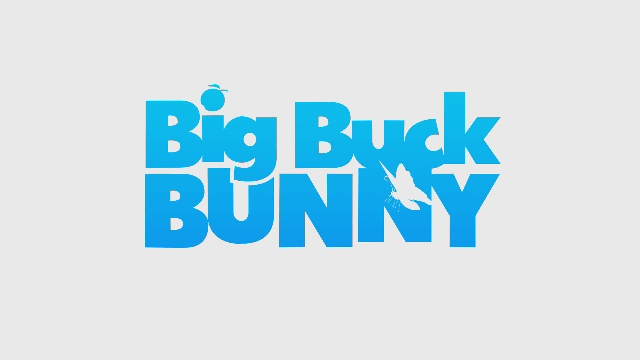

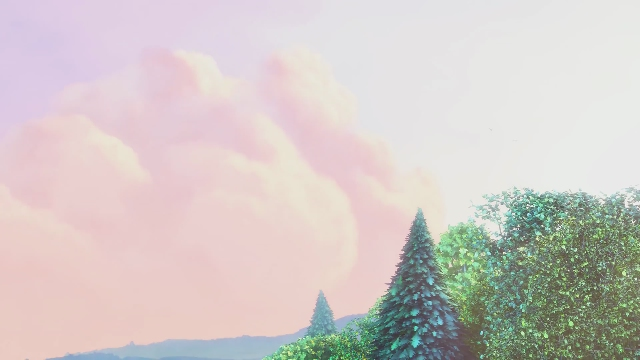

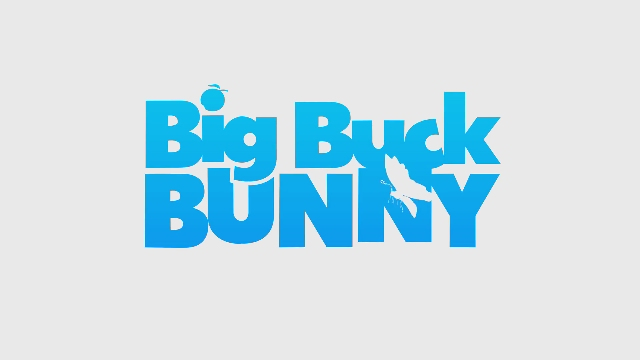

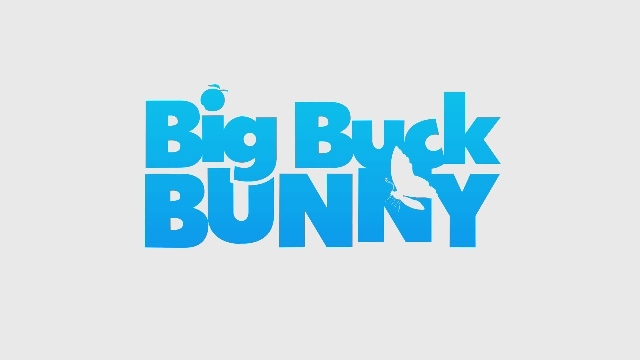

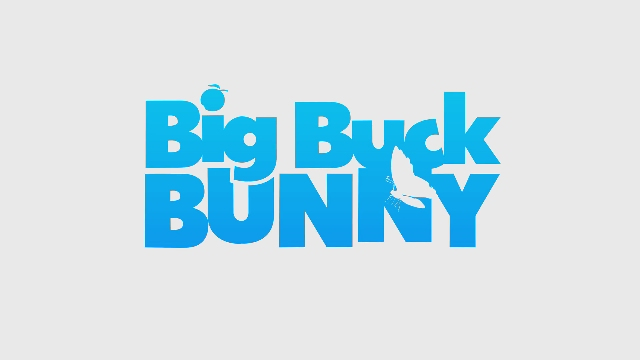

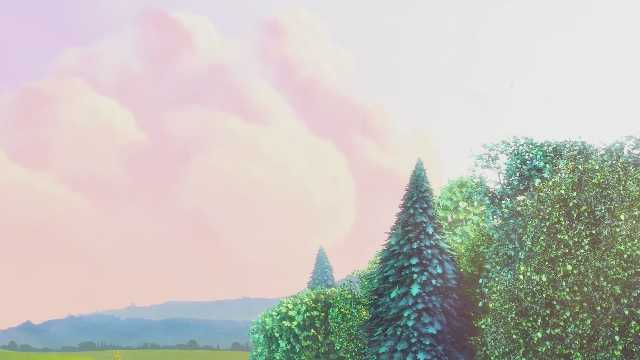

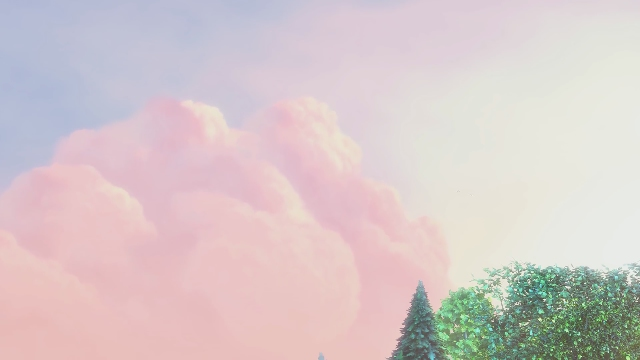

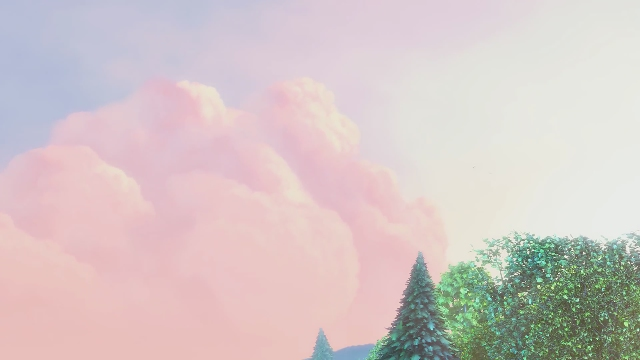

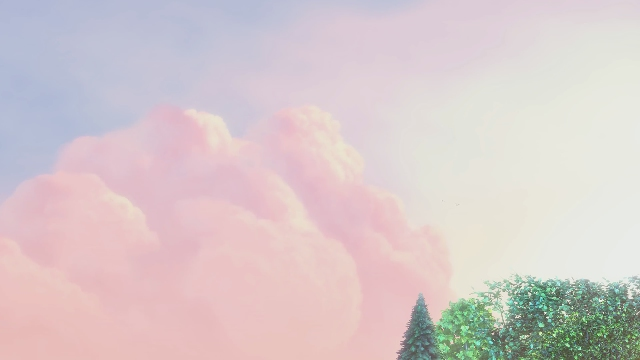

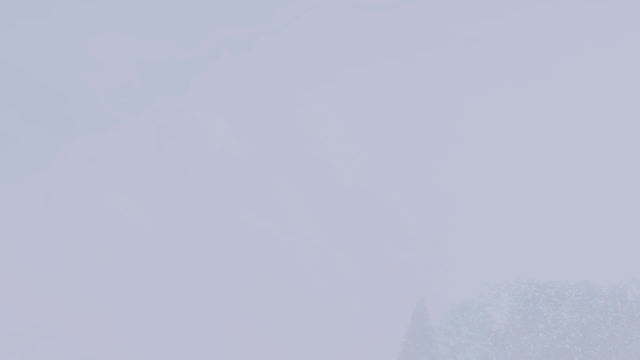

In [23]:
import glob

from IPython import display
from IPython.display import Image
from IPython.display import display

dir_path = r'/content/00*.jpg'
res = glob.glob(dir_path)

images = []
for im in res:
  print(im)
  images.append(Image(filename=im))
display(*images)